#📍physicalLocation 

[overview](#overview) 

[location_1](#loc1)
- [get overall pass/fail scores](#loc1_all)
- [get pass/fail scores by division](#loc1_scoresbydiv)
- [look at failing scores by collection](#loc1_scoresbycoll)
- [look at failing scores within a collection](#loc1_scoresincoll)

[location_2](#loc2)
- [get overall pass/fail scores](#loc2_all)
- [get pass/fail scores by division](#loc2_scoresbydiv)
- [look at failing scores by collection](#loc2_scoresbycoll)
- [look at failing scores within a collection](#loc2_scoresincoll)

[location_3](#loc3)
- [get overall pass/fail scores](#loc3_all)
- [get pass/fail scores by division](#loc3_scoresbydiv)
- [look at failing scores by collection](#loc3_scoresbycoll)
- [look at failing scores within a collection](#loc3_scoresincoll)
- [plotting](#loc32_plot)

[location_4](#loc4)
- [get overall pass/fail scores](#loc4_all)
- [get pass/fail scores by division](#loc4_scoresbydiv)
- [look at failing scores by collection](#loc4_scoresbycoll)
- [look at failing scores within a collection](#loc4_scoresincoll)

[location_5](#loc5)
- [get overall pass/fail scores](#loc5_all)
- [get pass/fail scores by division](#loc5_scoresbydiv)
- [look at failing scores by collection](#loc5_scoresbycoll)
- [look at failing scores within a collection](#loc5_scoresincoll)

[co-occurrences](#co)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv('min-mandatory-score_2016-07-08.csv')

In [2]:
# testing 1-2-1-2
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 965066 entries, 0 to 965065
Data columns (total 25 columns):
uuid              965066 non-null object
mms_id            965066 non-null int64
mms_type          965066 non-null object
coll_id           962212 non-null float64
division          965066 non-null object
title_1           965066 non-null int64
title_2           965066 non-null int64
title             965066 non-null float64
typeOfResource    965066 non-null int64
genre_1           965066 non-null int64
genre_2           965066 non-null int64
genre             965066 non-null float64
date_1            965066 non-null int64
date_2            965066 non-null int64
date_3            965066 non-null int64
date_4            965066 non-null int64
date              965066 non-null float64
identifier        965066 non-null int64
location_1        965066 non-null int64
location_2        965066 non-null int64
location_3        965066 non-null int64
location_4        965066 non-null int6

In [2]:
# check that basic completeness scores look OK
df[['title_1','typeOfResource', 'identifier', 'date_1', 'genre_1', 'location_1']].describe()

##overview<a id="overview"></a>

In [3]:
# look at all the location scores
df.location.value_counts()

1.0    708774
0.8    244100
0.6     11419
0.4       581
0.2       192
dtype: int64

In [5]:
# calculate the number of complete Physical Location elements
print 'these records have repository, division, and shelf locator locations:'
locs123 = df[(df.location_1 == 1.0) & (df.location_2 == 1.0) & (df.location_3 == 1.0)]
print len(locs123)

these records have repository, division, and shelf locator locations:
729856


##location_1<a id="loc1"></a>
- ######record has repository information
- [get overall pass/fail scores](#loc1_all)
- [get pass/fail scores by division](#loc1_scoresbydiv)
- [look at failing scores by collection](#loc1_scoresbycoll)
- [look at failing scores within a collection](#loc1_scoresincoll)

####location_1: get overall pass/fail scores<a id="loc1_all"></a>

In [6]:
# record has repository information
df.location_1.value_counts()

1    885297
0     79769
dtype: int64

####location_1: look at failing scores by division<a id="loc1_scoresbydiv"></a>

In [6]:
# see location_1 pass/fail by division
loc1_table = pd.pivot_table(df,index=['division'],columns=['location_1'], aggfunc={'location_1':len},fill_value=0)
loc1_table

location_1  \
location_1                                                                                                     0   
division                                                                                                           
Art and Picture Collection                                                                                     1   
Billy Rose Theatre Division                                                                                  546   
Carl H. Pforzheimer Collection of Shelley and His Circle                                                    1213   
Children's Center at 42nd St                                                                                  18   
Dorot Jewish Division                                                                                        203   
Dorothy and Lewis B. Cullman Center for Scholars & Writers                                                     0   
General Research Division                                                                                   1318   
George Arents Collection                                                                                     107   
Henry W. and Albert A. Berg Collection of English and American Literature                                    287   
Irma and Paul Milstein Division of United States History, Local History and Genealogy                       1444   
Jerome Robbins Dance Division                                                                                481   
Jerome Robbins Dance Division - Audio and Moving Image                                                      3280   
Lionel Pincus and Princess Firyal Map Division                                                              2929   
Manuscripts and Archives Division                                                                            463   
Music Division                                                                                               404   
New York Public Library Archives                                                                               0   
Null                                                                                                         107   
RHA                                                                                                           48   
Rare Book Division                                                                                          8847   
Rodgers and Hammerstein Archives of Recorded Sound                                                          1468   
Schomburg Center for Research in Black Culture, Art and Artifacts Division                                     0   
Schomburg Center for Research in Black Culture, Jean Blackwell Hutson Research and Reference Division        403   
Schomburg Center for Research in Black Culture, Manuscripts, Archives and Rare Books Division                688   
Schomburg Center for Research in Black Culture, Moving Image and Recorded Sound Division                       0   
Schomburg Center for Research in Black Culture, Photographs and Prints Division                              124   
Schomburg General Research and Reference Division                                                            498   
Science, Industry and Business Library: General Collection                                                   140   
Slavic and East European Collections                                                                        2069   
Spencer Collection                                                                                           842   
The Miriam and Ira D. Wallach Division of Art, Prints and Photographs: Art & Architecture Collection        1046   
The Miriam and Ira D. Wallach Division of Art, Prints and Photographs: Photography Collection              42222   
The Miriam and Ira D. Wallach Division of Art, Prints and Photographs: Print Collection                     8573   
Theatre on Film and Tape Archive          

In [7]:
# look at failing location_1 scores by division in descending order
# len = total rows and sum = rows that passed
aggregation = {
    'location_1':{
        'failing_scores1':lambda x:len(x)-sum(x)
    }
}
# create dataframe that groups by division and aggregrate by dictionary
failed_locations = df.groupby('division').agg(aggregation)

# define failed locations
failed_loc1 = failed_locations['location_1']['failing_scores1']
failed_loc1.order(ascending=False)

division
The Miriam and Ira D. Wallach Division of Art, Prints and Photographs: Photography Collection    42222
Rare Book Division                                               8847
The Miriam and Ira D. Wallach Division of Art, Prints and Photographs: Print Collection     8573
Jerome Robbins Dance Division - Audio and Moving Image           3280
Lionel Pincus and Princess Firyal Map Division                   2929
Slavic and East European Collections                             2069
Rodgers and Hammerstein Archives of Recorded Sound               1468
Irma and Paul Milstein Division of United States History, Local History and Genealogy     1444
General Research Division                                        1318
Carl H. Pforzheimer Collection of Shelley and His Circle         1213
The Miriam and Ira D. Wallach Division of Art, Prints and Photographs: Art & Architecture Collection     1046
Spencer Collection                                                842
Schomburg Center for Resea

####location_1: look at failing scores by collection<a id="loc1_scoresbycoll"></a>

In [9]:
loc1_by_coll = pd.pivot_table(df,index=['coll_id'],columns=['location_1'],aggfunc={'location_1':len},fill_value=0)
loc1_by_coll.head(10)

location_1        
location_1          0       1
coll_id                      
25776             117     754
25779               0  100951
25780               0   80542
25781               0   15790
25782              12   72677
25783           38546    4299
25784               0   34799
25785               0   34756
25786               0   31267
25787               0   24771

In [2]:
# look at failing location_1 scores by collection
df[df['location_1'] == 0.0][['mms_id', 'coll_id', 'division']].sort('coll_id').head()

,mms_id,coll_id,division
64,3012505,25776,Lionel Pincus and Princess Firyal Map Division
398,3013423,25776,Lionel Pincus and Princess Firyal Map Division
397,3013419,25776,Lionel Pincus and Princess Firyal Map Division
396,3013416,25776,Lionel Pincus and Princess Firyal Map Division
395,3013412,25776,Lionel Pincus and Princess Firyal Map Division


In [9]:
# create dataframe that groups by collection and aggregrate by dictionary
failed_genres = df.groupby('coll_id').agg(aggregation)
# define failed location
failed_loc1 = failed_genres['location_1']['failing_scores1']
failed_loc1.order(ascending=False)

coll_id
25783      38546
28752       7311
25789       7252
47312       3203
41293       2291
44210       1516
25876       1252
25828       1143
25826       1066
25867        563
25874        535
25894        475
25904        445
26551        400
28804        328
...
39165      0
39166      0
39167      0
39168      0
39170      0
39182      0
39171      0
39174      0
39175      0
39176      0
39177      0
42630      0
39180      0
39181      0
48750      0
Name: failing_scores1, Length: 6284, dtype: int64

####location_1: look at failing scores within a collection<a id="loc1_scoresincoll"></a>

In [10]:
# look at failing location_1 scores within a collection
floc1 = df[df['location_1'] == 0.0][['mms_id', 'coll_id', 'division']]

# 25780 is the Billy Rose Theatre Collection photograph file
floc1_25780 = floc1[floc1['coll_id'] == 25780][['mms_id','coll_id', 'division']].sort(['mms_id'])

# use .count() for report stats; remove .count() for data
floc1_25780.count()

mms_id      0
coll_id     0
division    0
dtype: int64

##location_2<a id="loc2"></a>
####assertion: presence of a division location
- [get overall pass/fail scores](#loc2_all)
- [get pass/fail scores by division](#loc2_scoresbydiv)
- [look at failing scores by collection](#loc2_scoresbycoll)
- [look at failing scores within a collection](#loc2_scoresincoll)

####location_2: get overall pass/fail scores<a id="loc2_all"></a>

In [19]:
# record has a division location
df.location_2.value_counts()

1    964791
0       275
dtype: int64

####location_2: look at failing scores by division<a id="loc2_scoresbydiv"></a>

In [12]:
# see location_2 pass/fail by division
loc2_table = pd.pivot_table(df,index=['division'],columns=['location_2'], aggfunc={'location_2':len},fill_value=0)
loc2_table

location_2  \
location_2                                                                                                     0   
division                                                                                                           
Art and Picture Collection                                                                                     0   
Billy Rose Theatre Division                                                                                    0   
Carl H. Pforzheimer Collection of Shelley and His Circle                                                       0   
Children's Center at 42nd St                                                                                   0   
Dorot Jewish Division                                                                                          0   
Dorothy and Lewis B. Cullman Center for Scholars & Writers                                                     0   
General Research Division                                                                                      0   
George Arents Collection                                                                                       0   
Henry W. and Albert A. Berg Collection of English and American Literature                                      0   
Irma and Paul Milstein Division of United States History, Local History and Genealogy                          0   
Jerome Robbins Dance Division                                                                                  0   
Jerome Robbins Dance Division - Audio and Moving Image                                                         0   
Lionel Pincus and Princess Firyal Map Division                                                                 0   
Manuscripts and Archives Division                                                                              0   
Music Division                                                                                                 0   
New York Public Library Archives                                                                               0   
Null                                                                                                         275   
RHA                                                                                                            0   
Rare Book Division                                                                                             0   
Rodgers and Hammerstein Archives of Recorded Sound                                                             0   
Schomburg Center for Research in Black Culture, Art and Artifacts Division                                     0   
Schomburg Center for Research in Black Culture, Jean Blackwell Hutson Research and Reference Division          0   
Schomburg Center for Research in Black Culture, Manuscripts, Archives and Rare Books Division                  0   
Schomburg Center for Research in Black Culture, Moving Image and Recorded Sound Division                       0   
Schomburg Center for Research in Black Culture, Photographs and Prints Division                                0   
Schomburg General Research and Reference Division                                                              0   
Science, Industry and Business Library: General Collection                                                     0   
Slavic and East European Collections                                                                           0   
Spencer Collection                                                                                             0   
The Miriam and Ira D. Wallach Division of Art, Prints and Photographs: Art & Architecture Collection           0   
The Miriam and Ira D. Wallach Division of Art, Prints and Photographs: Photography Collection                  0   
The Miriam and Ira D. Wallach Division of Art, Prints and Photographs: Print Collection                        0   
Theatre on Film and Tape Archive          

In [13]:
# look at failing location_2 scores by division in descending order
# len = total rows and sum = rows that passed
aggregation = {
    'location_2':{
        'failing_scores1':lambda x:len(x)-sum(x)
    }
}
# create dataframe that groups by division and aggregrate by dictionary
failed_locations = df.groupby('division').agg(aggregation)

# define failed location_2
failed_loc2 = failed_locations['location_2']['failing_scores1']
failed_loc2.order(ascending=False)

division
Null                                                            275
Henry W. and Albert A. Berg Collection of English and American Literature      0
Music Division                                                    0
Manuscripts and Archives Division                                 0
Lionel Pincus and Princess Firyal Map Division                    0
Jerome Robbins Dance Division - Audio and Moving Image            0
Jerome Robbins Dance Division                                     0
Irma and Paul Milstein Division of United States History, Local History and Genealogy      0
George Arents Collection                                          0
Theatre on Film and Tape Archive                                  0
General Research Division                                         0
Dorothy and Lewis B. Cullman Center for Scholars & Writers        0
Dorot Jewish Division                                             0
Children's Center at 42nd St                                      0
C

In [16]:
failed_loc2.order(ascending=False)

division
Null                                                            275
Henry W. and Albert A. Berg Collection of English and American Literature      0
Music Division                                                    0
Manuscripts and Archives Division                                 0
Lionel Pincus and Princess Firyal Map Division                    0
Jerome Robbins Dance Division - Audio and Moving Image            0
Jerome Robbins Dance Division                                     0
Irma and Paul Milstein Division of United States History, Local History and Genealogy      0
George Arents Collection                                          0
Theatre on Film and Tape Archive                                  0
General Research Division                                         0
Dorothy and Lewis B. Cullman Center for Scholars & Writers        0
Dorot Jewish Division                                             0
Children's Center at 42nd St                                      0
C

####location_2: look at failing scores by collection<a id="loc2_scoresbycoll"></a>

In [17]:
# look at failing location_2 scores by collection
# create dataframe that groups by collection and aggregrate by dictionary
failed_locations = df.groupby('coll_id').agg(aggregation)

# subtract scores from one column to the other
failed_loc2 = failed_locations['location_2']['failing_scores1']
failed_loc2.order(ascending=False)

coll_id
40737      83
40071      45
25783      10
39580       9
25867       7
39400       5
40393       5
39119       4
40167       4
41193       4
25831       3
39251       3
25800       3
41564       2
25896       2
...
39532      0
39533      0
39534      0
39536      0
39546      0
39537      0
39538      0
39539      0
39540      0
39541      0
39542      0
39543      0
39544      0
39545      0
29285      0
Name: failing_scores1, Length: 6284, dtype: int64

####location_2: look at failing scores within a collection<a id="loc2_scoresincoll"></a>

In [10]:
# look at failing location_2 scores within a collection
floc2 = df[df['location_2'] == 0.0][['mms_id', 'coll_id', 'division']]

# 25780 is the Print Collection portrait file
floc2_40737 = floc2[floc2['coll_id'] == 40737][['mms_id','coll_id', 'division']].sort(['mms_id'])

# use .count() for report stats; remove .count() for data
floc2_40737.count()

mms_id      83
coll_id     83
division    83
dtype: int64

###!write to csv

In [ ]:
# let's get all the data out to a csv
loc2s_by_coll = pd.pivot_table(dates,index=['coll_id'],columns=['location_2'],aggfunc={'location_2':len},fill_value=0)
# write to csv
loc2s_by_coll.to_csv('test-loc2.csv')

##location_3<a id="loc3"></a>
####assertion: record has shelf locator information
- [get overall pass/fail scores](#loc3_all)
- [get pass/fail scores by division](#loc3_scoresbydiv)
- [look at failing scores by collection](#loc3_scoresbycoll)
- [look at failing scores within a collection](#loc3_scoresincoll)

####location_3: get overall pass/fail scores<a id="loc3_all"></a>

In [4]:
# record has shelf locator information
df.location_3.value_counts()

1    803529
0    161537
dtype: int64

####location_3: look at failing scores by division<a id="loc3_scoresbydiv"></a>

In [19]:
# see location_3 pass/fail by division
loc3_table = pd.pivot_table(df,index=['division'],columns=['location_3'], aggfunc={'location_3':len},fill_value=0)
loc3_table

location_3  \
location_3                                                                                                     0   
division                                                                                                           
Art and Picture Collection                                                                                   879   
Billy Rose Theatre Division                                                                                 5948   
Carl H. Pforzheimer Collection of Shelley and His Circle                                                   13178   
Children's Center at 42nd St                                                                                  31   
Dorot Jewish Division                                                                                         66   
Dorothy and Lewis B. Cullman Center for Scholars & Writers                                                    80   
General Research Division                                                                                    194   
George Arents Collection                                                                                       6   
Henry W. and Albert A. Berg Collection of English and American Literature                                    982   
Irma and Paul Milstein Division of United States History, Local History and Genealogy                       4672   
Jerome Robbins Dance Division                                                                                110   
Jerome Robbins Dance Division - Audio and Moving Image                                                        84   
Lionel Pincus and Princess Firyal Map Division                                                              6491   
Manuscripts and Archives Division                                                                           6432   
Music Division                                                                                              4832   
New York Public Library Archives                                                                               0   
Null                                                                                                          85   
RHA                                                                                                            0   
Rare Book Division                                                                                          2331   
Rodgers and Hammerstein Archives of Recorded Sound                                                           328   
Schomburg Center for Research in Black Culture, Art and Artifacts Division                                    95   
Schomburg Center for Research in Black Culture, Jean Blackwell Hutson Research and Reference Division        106   
Schomburg Center for Research in Black Culture, Manuscripts, Archives and Rare Books Division                869   
Schomburg Center for Research in Black Culture, Moving Image and Recorded Sound Division                       0   
Schomburg Center for Research in Black Culture, Photographs and Prints Division                             2348   
Schomburg General Research and Reference Division                                                            498   
Science, Industry and Business Library: General Collection                                                     2   
Slavic and East European Collections                                                                         314   
Spencer Collection                                                                                          1664   
The Miriam and Ira D. Wallach Division of Art, Prints and Photographs: Art & Architecture Collection         963   
The Miriam and Ira D. Wallach Division of Art, Prints and Photographs: Photography Collection              33244   
The Miriam and Ira D. Wallach Division of Art, Prints and Photographs: Print Collection                    74703   
Theatre on Film and Tape Archive          

In [20]:
# look at failing location_3 scores by division in descending order
# len = total rows and sum = rows that passed
aggregation = {
    'location_3':{
        'failing_scores1':lambda x:len(x)-sum(x)
    }
}
# create dataframe that groups by division and aggregrate by dictionary
failed_locations = df.groupby('division').agg(aggregation)

# define failed location_3
failed_loc3 = failed_locations['location_3']['failing_scores1']
failed_loc3.order(ascending=False)

division
The Miriam and Ira D. Wallach Division of Art, Prints and Photographs: Print Collection    74703
The Miriam and Ira D. Wallach Division of Art, Prints and Photographs: Photography Collection    33244
Carl H. Pforzheimer Collection of Shelley and His Circle        13178
Lionel Pincus and Princess Firyal Map Division                   6491
Manuscripts and Archives Division                                6432
Billy Rose Theatre Division                                      5948
Music Division                                                   4832
Irma and Paul Milstein Division of United States History, Local History and Genealogy     4672
Schomburg Center for Research in Black Culture, Photographs and Prints Division     2348
Rare Book Division                                               2331
Spencer Collection                                               1664
Henry W. and Albert A. Berg Collection of English and American Literature      982
The Miriam and Ira D. Wallach Divi

####location_3: look at failing scores by collection<a id="loc3_scoresbycoll"></a>

In [21]:
# look at failing location_3 scores by collection
# create dataframe that groups by collection and aggregrate by dictionary
failed_locations = df.groupby('coll_id').agg(aggregation)

# define failed location_3
failed_loc3 = failed_locations['location_3']['failing_scores1']
failed_loc3.order(ascending=False)

coll_id
25782      72687
25788      25412
25793      12204
28814       7534
25844       5652
29504       5577
25780       5563
25795       4758
41411       3128
25816       1537
25828       1143
25841        853
25831        847
25846        799
25789        639
...
39477      0
39478      0
39479      0
39480      0
39481      0
39482      0
39483      0
39484      0
39486      0
39487      0
39488      0
39489      0
39490      0
39491      0
29285      0
Name: failing_scores1, Length: 6284, dtype: int64

####location_3: look at failing scores within a collection<a id="loc3_scoresincoll"></a>

In [6]:
# look at failing location_3 scores within a collection
floc3 = df[df['location_3'] == 0.0][['mms_id', 'coll_id', 'division']]

# 25782 is the Print Collection portrait file
floc3_25782 = floc3[floc3['coll_id'] == 25782][['mms_id','coll_id', 'division']].sort(['mms_id'])

# use .count() for report stats; remove .count() for data
floc3_25782.count()

mms_id      72687
coll_id     72687
division    72687
dtype: int64

####plotting<a id="loc3_plot"></a>

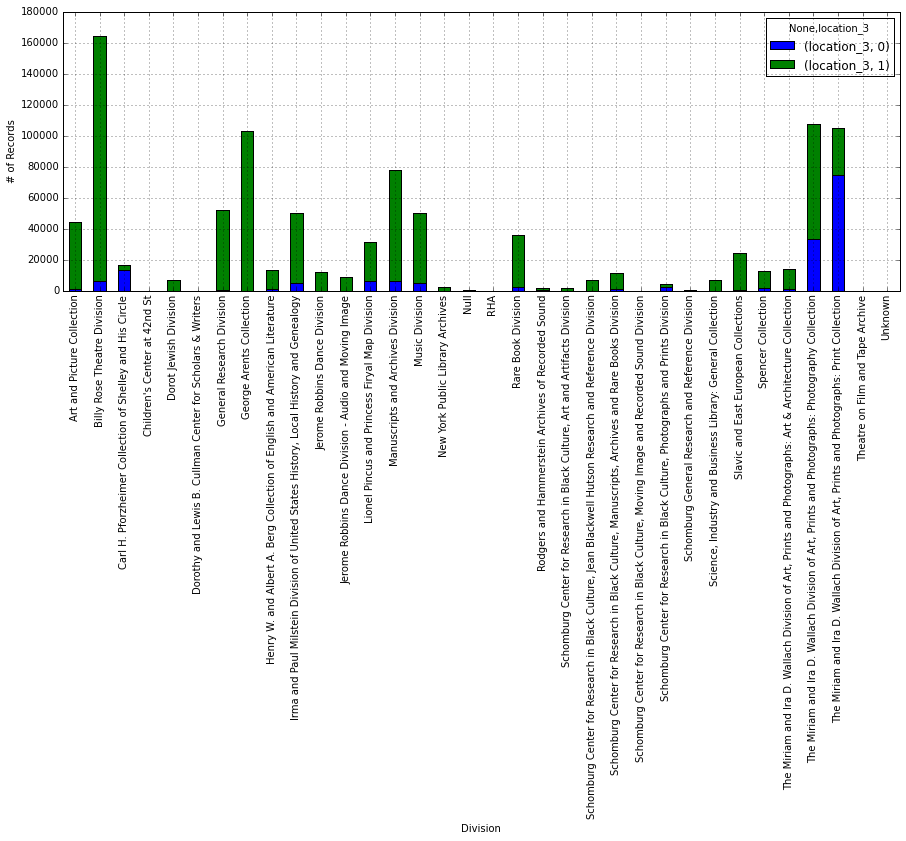

In [23]:
# create a bar chart plotting location_3 score counts by division
loc3_table = pd.pivot_table(df,index=['division'],columns=['location_3'], aggfunc={'location_3':len},fill_value=0)
loc3scoresplot = loc3_table.plot(kind='bar', figsize=(15,5), stacked=True)
loc3scoresplot.set_xlabel('Division')
loc3scoresplot.set_ylabel('# of Records')

##location_4<a id="loc4"></a>
######assertion: record has multiple location elements with consistent division values
- [get overall pass/fail scores](#loc4_all)
- [get pass/fail scores by division](#loc4_scoresbydiv)
- [look at failing scores by collection](#loc4_scoresbycoll)
- [look at failing scores within a collection](#loc4_scoresincoll)

####location_4: get overall pass/fail scores<a id="loc4_all"></a>

In [8]:
# record has multiple location elements with consistent division values
df.location_4.value_counts()

1    938022
0     27044
dtype: int64

####location_4: look at failing scores by division<a id="loc4_scoresbydiv"></a>

In [25]:
# get total number of records that failed location_4
# records failing location_4 will include those that failed location_1, so we need to 
# calculate the difference between records that failed location_4 and location_1

# len = total rows and sum = rows that passed
aggregation = {
    'location_2':{
        'failing_scores1':lambda x:len(x)-sum(x)
        },
    'location_4':{
        'failing_scores2':lambda x:len(x)-sum(x)
    }
}
# create dataframe that groups by division and aggregrate by dictionary
failed_locations = df.groupby('division').agg(aggregation)
# subtract scores from one column to the other
difference = failed_locations['location_4']['failing_scores2']-failed_locations['location_2']['failing_scores1']
difference.sum()

26769

In [27]:
difference.order(ascending=False)

division
Billy Rose Theatre Division                                     9132
Manuscripts and Archives Division                               5604
Jerome Robbins Dance Division - Audio and Moving Image          5247
New York Public Library Archives                                2331
General Research Division                                       1017
Spencer Collection                                               708
Jerome Robbins Dance Division                                    681
Rare Book Division                                               572
Schomburg Center for Research in Black Culture, Manuscripts, Archives and Rare Books Division     360
Slavic and East European Collections                             319
The Miriam and Ira D. Wallach Division of Art, Prints and Photographs: Photography Collection     251
The Miriam and Ira D. Wallach Division of Art, Prints and Photographs: Art & Architecture Collection     194
The Miriam and Ira D. Wallach Division of Art, Prints and

####location_4: look at failing scores by collection<a id="loc4_scoresbycoll"></a>
Identify the number of collections with conflicting division values

In [28]:
# look at failing location_4 scores by collection
# create dataframe that groups by collection and aggregrate by dictionary
failed_locations = df.groupby('coll_id').agg(aggregation)
# subtract scores from one column to the other
difference = failed_locations['location_4']['failing_scores2']-failed_locations['location_2']['failing_scores1']
difference.order(ascending=False)

coll_id
25790      9125
29504      5566
25805      2256
41019       818
25857       729
29753       675
40936       649
40990       609
40943       527
25881       509
41456       503
40939       467
46210       309
40942       266
48150       204
...
39480      0
39481      0
39482      0
39484      0
39496      0
39486      0
39487      0
39488      0
39490      0
39491      0
39492      0
39493      0
39494      0
39495      0
25776      0
Length: 6284, dtype: int64

###!write to csv

In [13]:
# let's get all the data out to a csv
loc4_by_coll = pd.pivot_table(df,index=['coll_id'],columns=['location_4'],aggfunc={'location_4':len},fill_value=0)
# write to csv
loc4_by_coll.to_csv('loc4-by-coll.csv')

####location_4: look at failing scores within a collection<a id="loc4_scoresincoll"></a>

In [5]:
# look at failing location_4 scores within a collection
floc4 = df[df['location_4'] == 0.0][['mms_id', 'coll_id', 'division']]

# 25782 is the Print Collection portrait file
floc4_25782 = floc4[floc4['coll_id'] == 25782][['mms_id','coll_id', 'division']].sort(['mms_id'])

# use .count() for report stats; remove .count() for data
floc4_25782.count()

mms_id      2
coll_id     2
division    2
dtype: int64

##location_5<a id="loc5"></a>
####assertion: record has all three division location types: 'division', 'division_short_name', 'code'
- [get overall pass/fail scores](#loc5_all)
- [get pass/fail scores by division](#loc5_scoresbydiv)
- [look at failing scores by collection](#loc5_scoresbycoll)
- [look at failing scores within a collection](#loc5_scoresincoll)

####location_5: get overall pass/fail scores<a id="loc5_all"></a>

In [7]:
# record has all three division location types: 'division', 'division_short_name', 'code'
df.location_5.value_counts()

1    964242
0       824
dtype: int64

####location_5: look at failing scores by division<a id="loc5_scoresbydiv"></a>

In [6]:
# get total number of records that failed location_5
# records failing location_5 will include those that failed location_2, so we need to 
# calculate the difference between records that failed location_5 and location_2

# len = total rows and sum = rows that passed
aggregation = {
    'location_2':{
        'failing_scores1':lambda x:len(x)-sum(x)
        },
    'location_5':{
        'failing_scores2':lambda x:len(x)-sum(x)
    }
}
# create dataframe that groups by division and aggregrate by dictionary
failed_locations = df.groupby('division').agg(aggregation)

# subtract scores from one column to the other
difference = failed_locations['location_5']['failing_scores2']-failed_locations['location_2']['failing_scores1']
difference.sum()

549

In [7]:
difference.order(ascending=False)

division
Schomburg General Research and Reference Division               498
RHA                                                              48
Unknown                                                           3
Henry W. and Albert A. Berg Collection of English and American Literature      0
Manuscripts and Archives Division                                 0
Lionel Pincus and Princess Firyal Map Division                    0
Jerome Robbins Dance Division - Audio and Moving Image            0
Jerome Robbins Dance Division                                     0
Irma and Paul Milstein Division of United States History, Local History and Genealogy      0
George Arents Collection                                          0
New York Public Library Archives                                  0
General Research Division                                         0
Dorothy and Lewis B. Cullman Center for Scholars & Writers        0
Dorot Jewish Division                                             0
C

####location_5: look at failing scores by collection<a id="loc5_scoresbycoll"></a>

In [33]:
# look at failing location_5 scores by collection
# create dataframe that groups by collection and aggregrate by dictionary
failed_locations = df.groupby('coll_id').agg(aggregation)
# subtract scores from one column to the other
difference = failed_locations['location_5']['failing_scores2']-failed_locations['location_2']['failing_scores1']
difference.order(ascending=False)

coll_id
47312      48
48750       0
28189       0
28177       0
28178       0
28179       0
28180       0
28181       0
28182       0
28183       0
28185       0
28187       0
28188       0
28190       0
28175       0
...
39543      0
39544      0
39545      0
39547      0
39557      0
39548      0
39549      0
39550      0
39551      0
39552      0
39553      0
39554      0
39555      0
39556      0
25776      0
Length: 6284, dtype: int64

####location_5: look at failing scores within a collection<a id="loc5_scoresincoll"></a>

In [8]:
# look at failing location_5 scores within a collection
floc5 = df[df['location_5'] == 0.0][['mms_id', 'coll_id', 'division']]

# 25782 is the Print Collection portrait file
floc5_25782 = floc5[floc5['coll_id'] == 25782][['mms_id','coll_id', 'division']].sort(['mms_id'])

# use .count() for report stats; remove .count() for data
floc5_25782.count()

mms_id      1
coll_id     1
division    1
dtype: int64

### co-occurrences<a id="co"></a>

In [9]:
print 'These records have no repository but do have an identifier:'
missingloc1_with_ids = df[(df.identifier == 1.0) & (df.location_1 == 0.0)]
print len(missingloc1_with_ids)

print 'These records have no division but do have an identifier:'
missingloc2_with_ids = df[(df.identifier == 1.0) & (df.location_2 == 0.0)]
print len(missingloc2_with_ids)

print 'These records have no shelf locator but do have an identifier:' 
missingloc3_with_ids = df[(df.identifier == 1.0) & (df.location_3 == 0.0)]
print len(missingloc3_with_ids)

print 'These records have no conflicting division values but do have a shelf locator:' 
missingloc4_with_loc3 = df[(df.location_3 == 1.0) & (df.location_4 == 0.0)]
print len(missingloc4_with_loc3)

These records have no repository but do have an identifier:
59938
These records have no division but do have an identifier:
225
These records have no shelf locator but do have an identifier:
6463
These records have no conflicting division values but do have a shelf locator:
21273
